In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
# import some dataset from sklearn
# iris = datasets.load_iris(as_frame=True).frame

In [61]:
iris = pd.read_csv("iris.csv")

In [63]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


<BarContainer object of 3 artists>

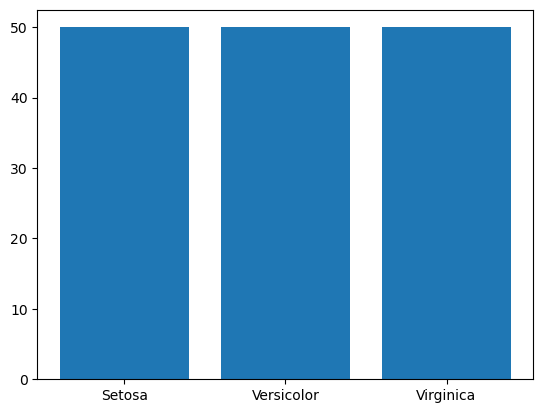

In [5]:
# Plot a bar chart to visualize the category of class on the ship
counts = iris["variety"].value_counts()
plt.bar(counts.index, counts.values)

<Axes: xlabel='variety', ylabel='count'>

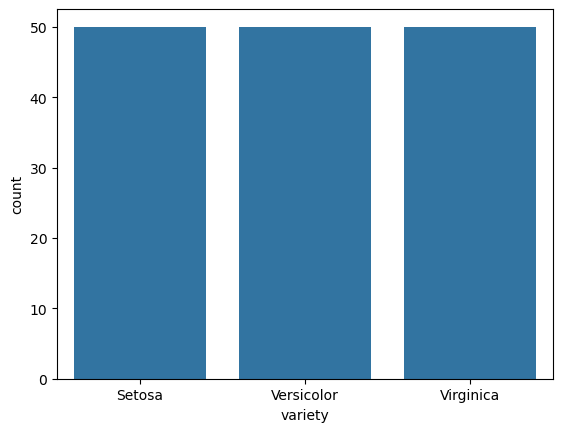

In [65]:
# Bar plot for categorical column "variety"
import seaborn as sns
counts = iris["variety"].value_counts()
sns.barplot(data = counts )

In [67]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [71]:
iris[iris.duplicated(keep= False)]

,sepal.length,sepal.width,petal.length,petal.width,variety
101,5.8,2.7,5.1,1.9,Virginica
142,5.8,2.7,5.1,1.9,Virginica


#### Observations
- There are 150 rows and 5 columns
- There are no Null values
- There is one  duplicated row
- The x-columns are sepal.length, sepal.width, petal.length and petal.width
- All the x-columns are continuous
- The y-column is "variety" which is categorical
- There are three flower categories (classes)

In [76]:
# Drop the duplicates
iris = iris.drop_duplicates(keep='first')

In [78]:
# Ensure further that no duplicated rows are present
iris[iris.duplicated]

,sepal.length,sepal.width,petal.length,petal.width,variety


In [80]:
# Reset the index 
iris = iris.reset_index(drop=True)
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Virginica
145,6.3,2.5,5.0,1.9,Virginica
146,6.5,3.0,5.2,2.0,Virginica
147,6.2,3.4,5.4,2.3,Virginica


#### Perform label encoding of target column

In [82]:
# Encode the three flower classes as 0,1,2

labelencoder = LabelEncoder()
iris.iloc[:, -1] = labelencoder.fit_transform(iris.iloc[:,-1])
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
# Check the data types after label encoding
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


#### Observation
- The target column ('variety') is still object type. It needs to be converted to numeric(int)


In [84]:
# Convert the target column data type to integer

iris['variety'] = pd.to_numeric(labelencoder.fit_transform(iris['variety']))
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [18]:
# iris.columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width','target']

In [19]:
iris.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [86]:
# Divide the dataset in to x-columns and y-columns

X=iris.iloc[:,0:4]
Y=iris['variety']

In [88]:
# Further splitting of data into training and testing data sets
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3,random_state = 1)
x_train

,sepal.length,sepal.width,petal.length,petal.width
45,4.8,3.0,1.4,0.3
56,6.3,3.3,4.7,1.6
39,5.1,3.4,1.5,0.2
36,5.5,3.5,1.3,0.2
116,6.5,3.0,5.5,1.8
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [90]:
x_train

,sepal.length,sepal.width,petal.length,petal.width
45,4.8,3.0,1.4,0.3
56,6.3,3.3,4.7,1.6
39,5.1,3.4,1.5,0.2
36,5.5,3.5,1.3,0.2
116,6.5,3.0,5.5,1.8
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


### Building Decision Tree Classifier using Entropy Criteria

In [92]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth =None)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

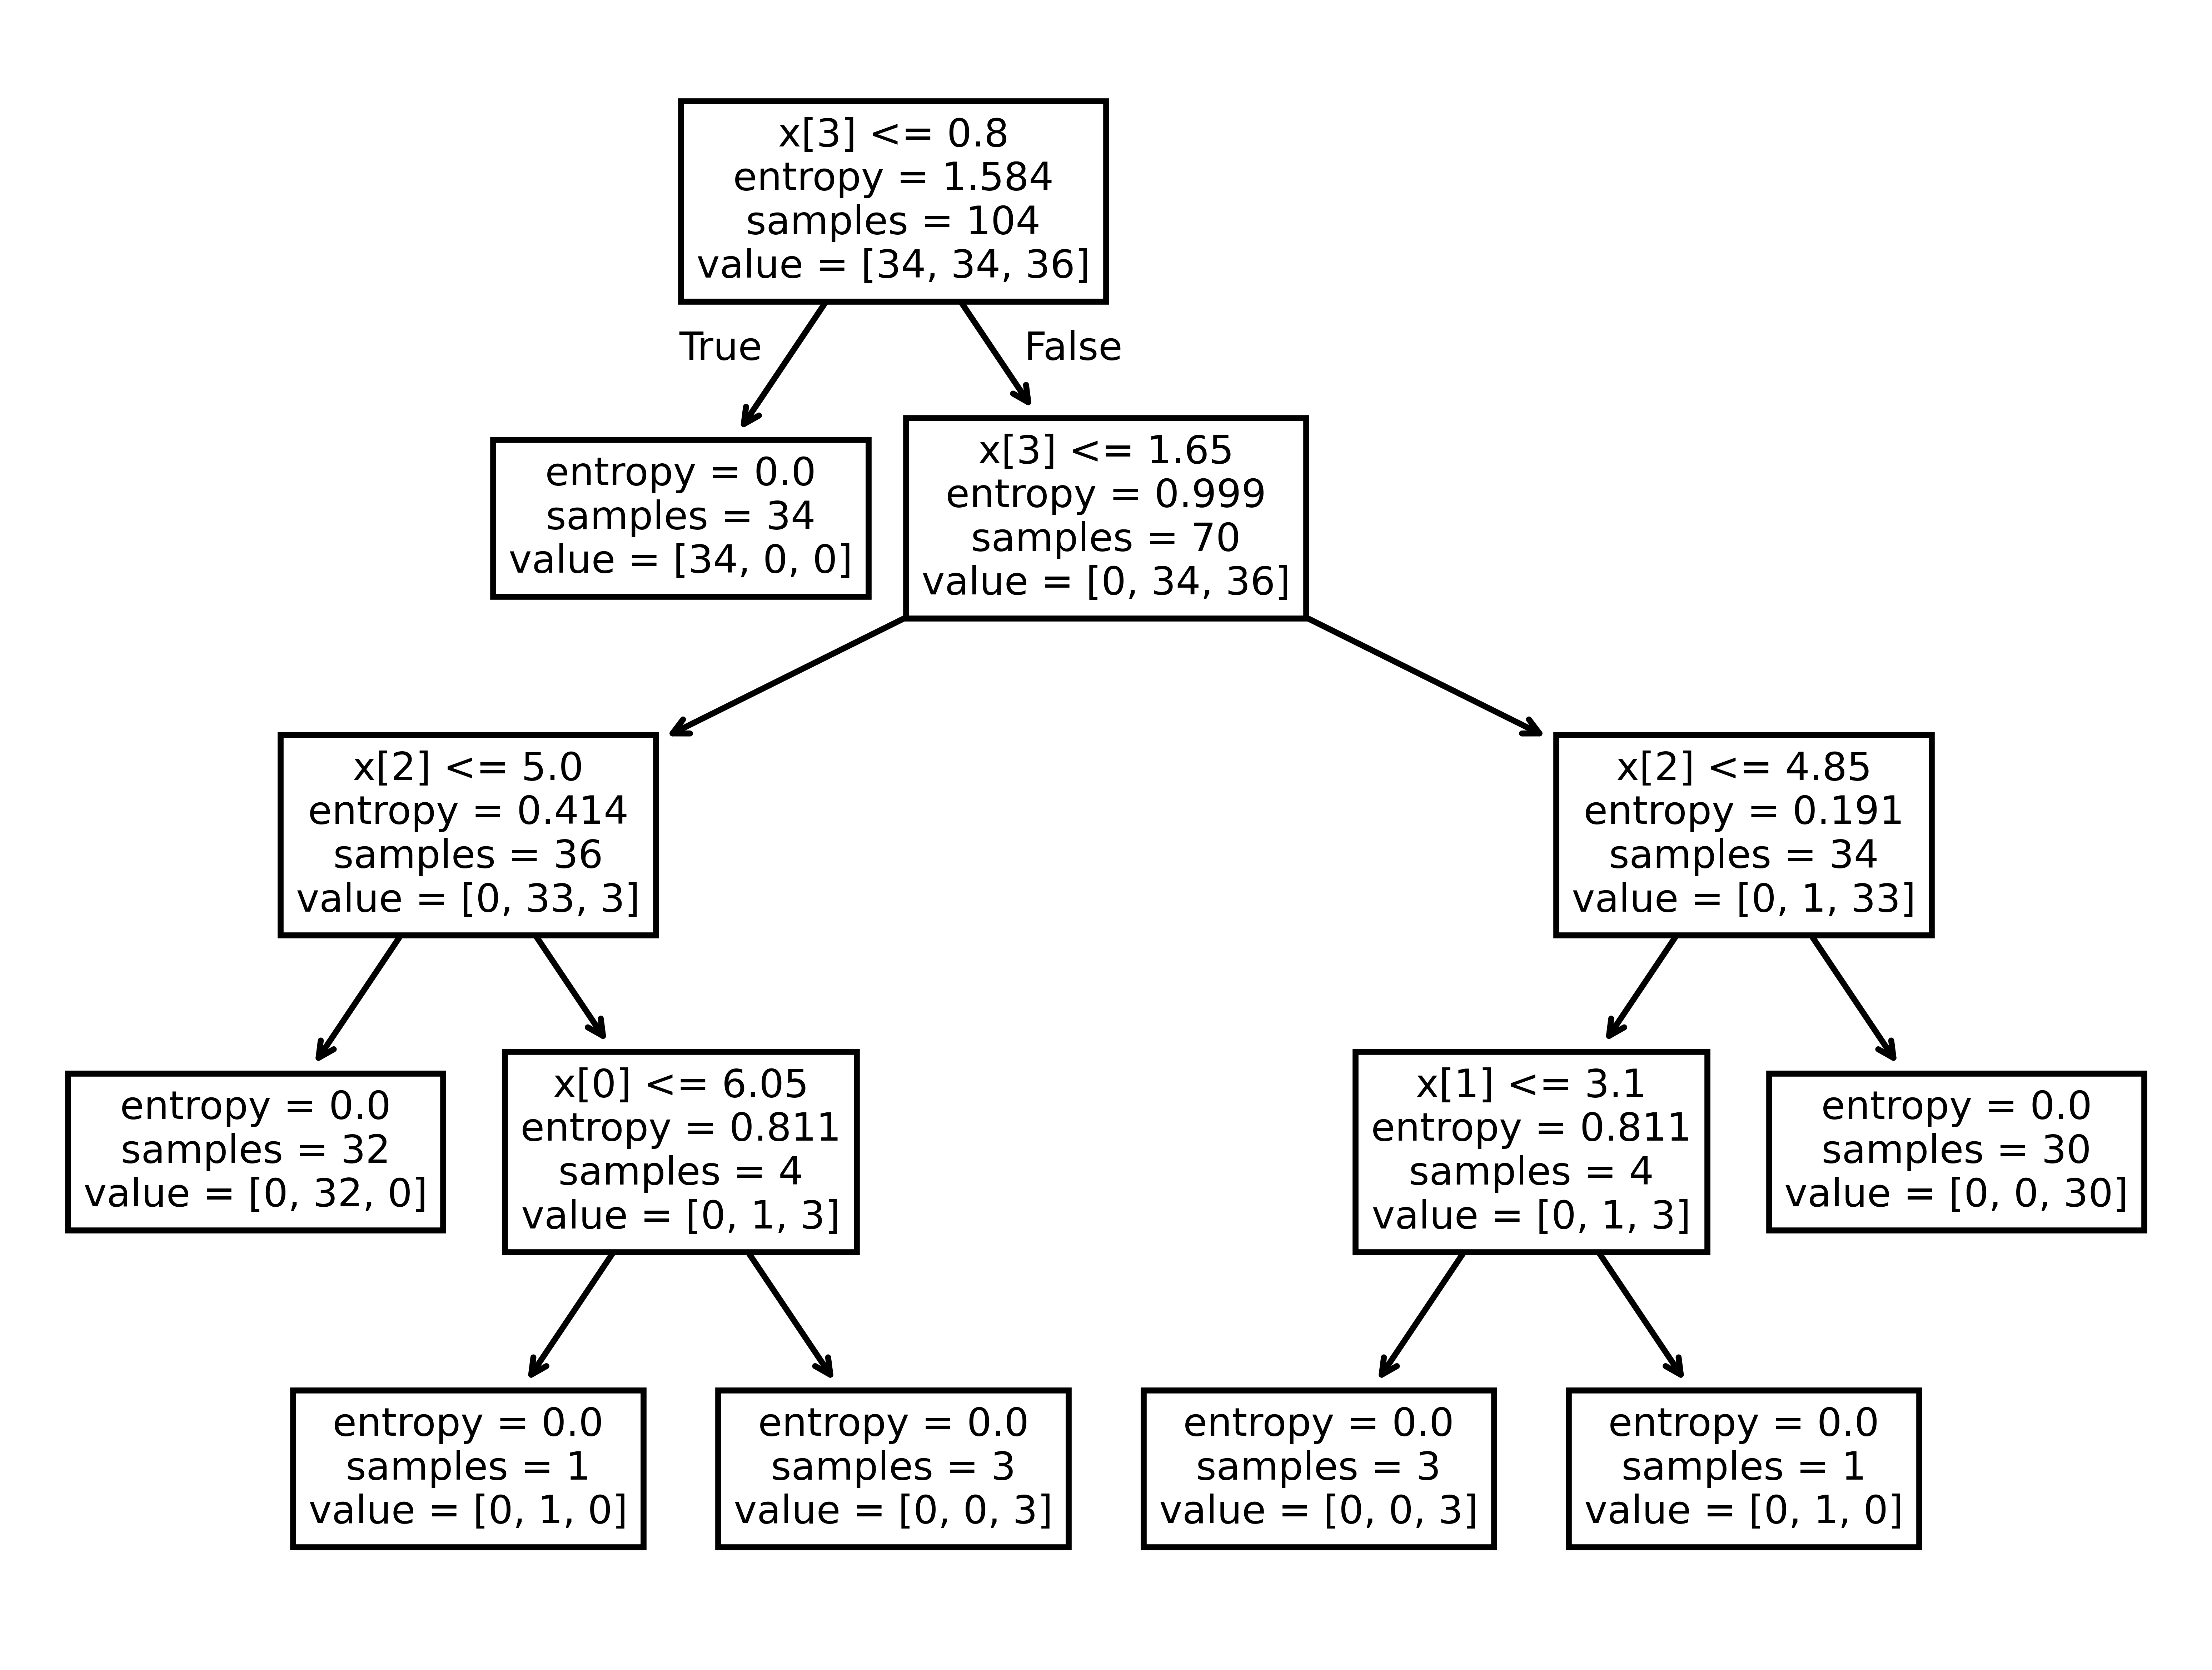

In [94]:
#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model);

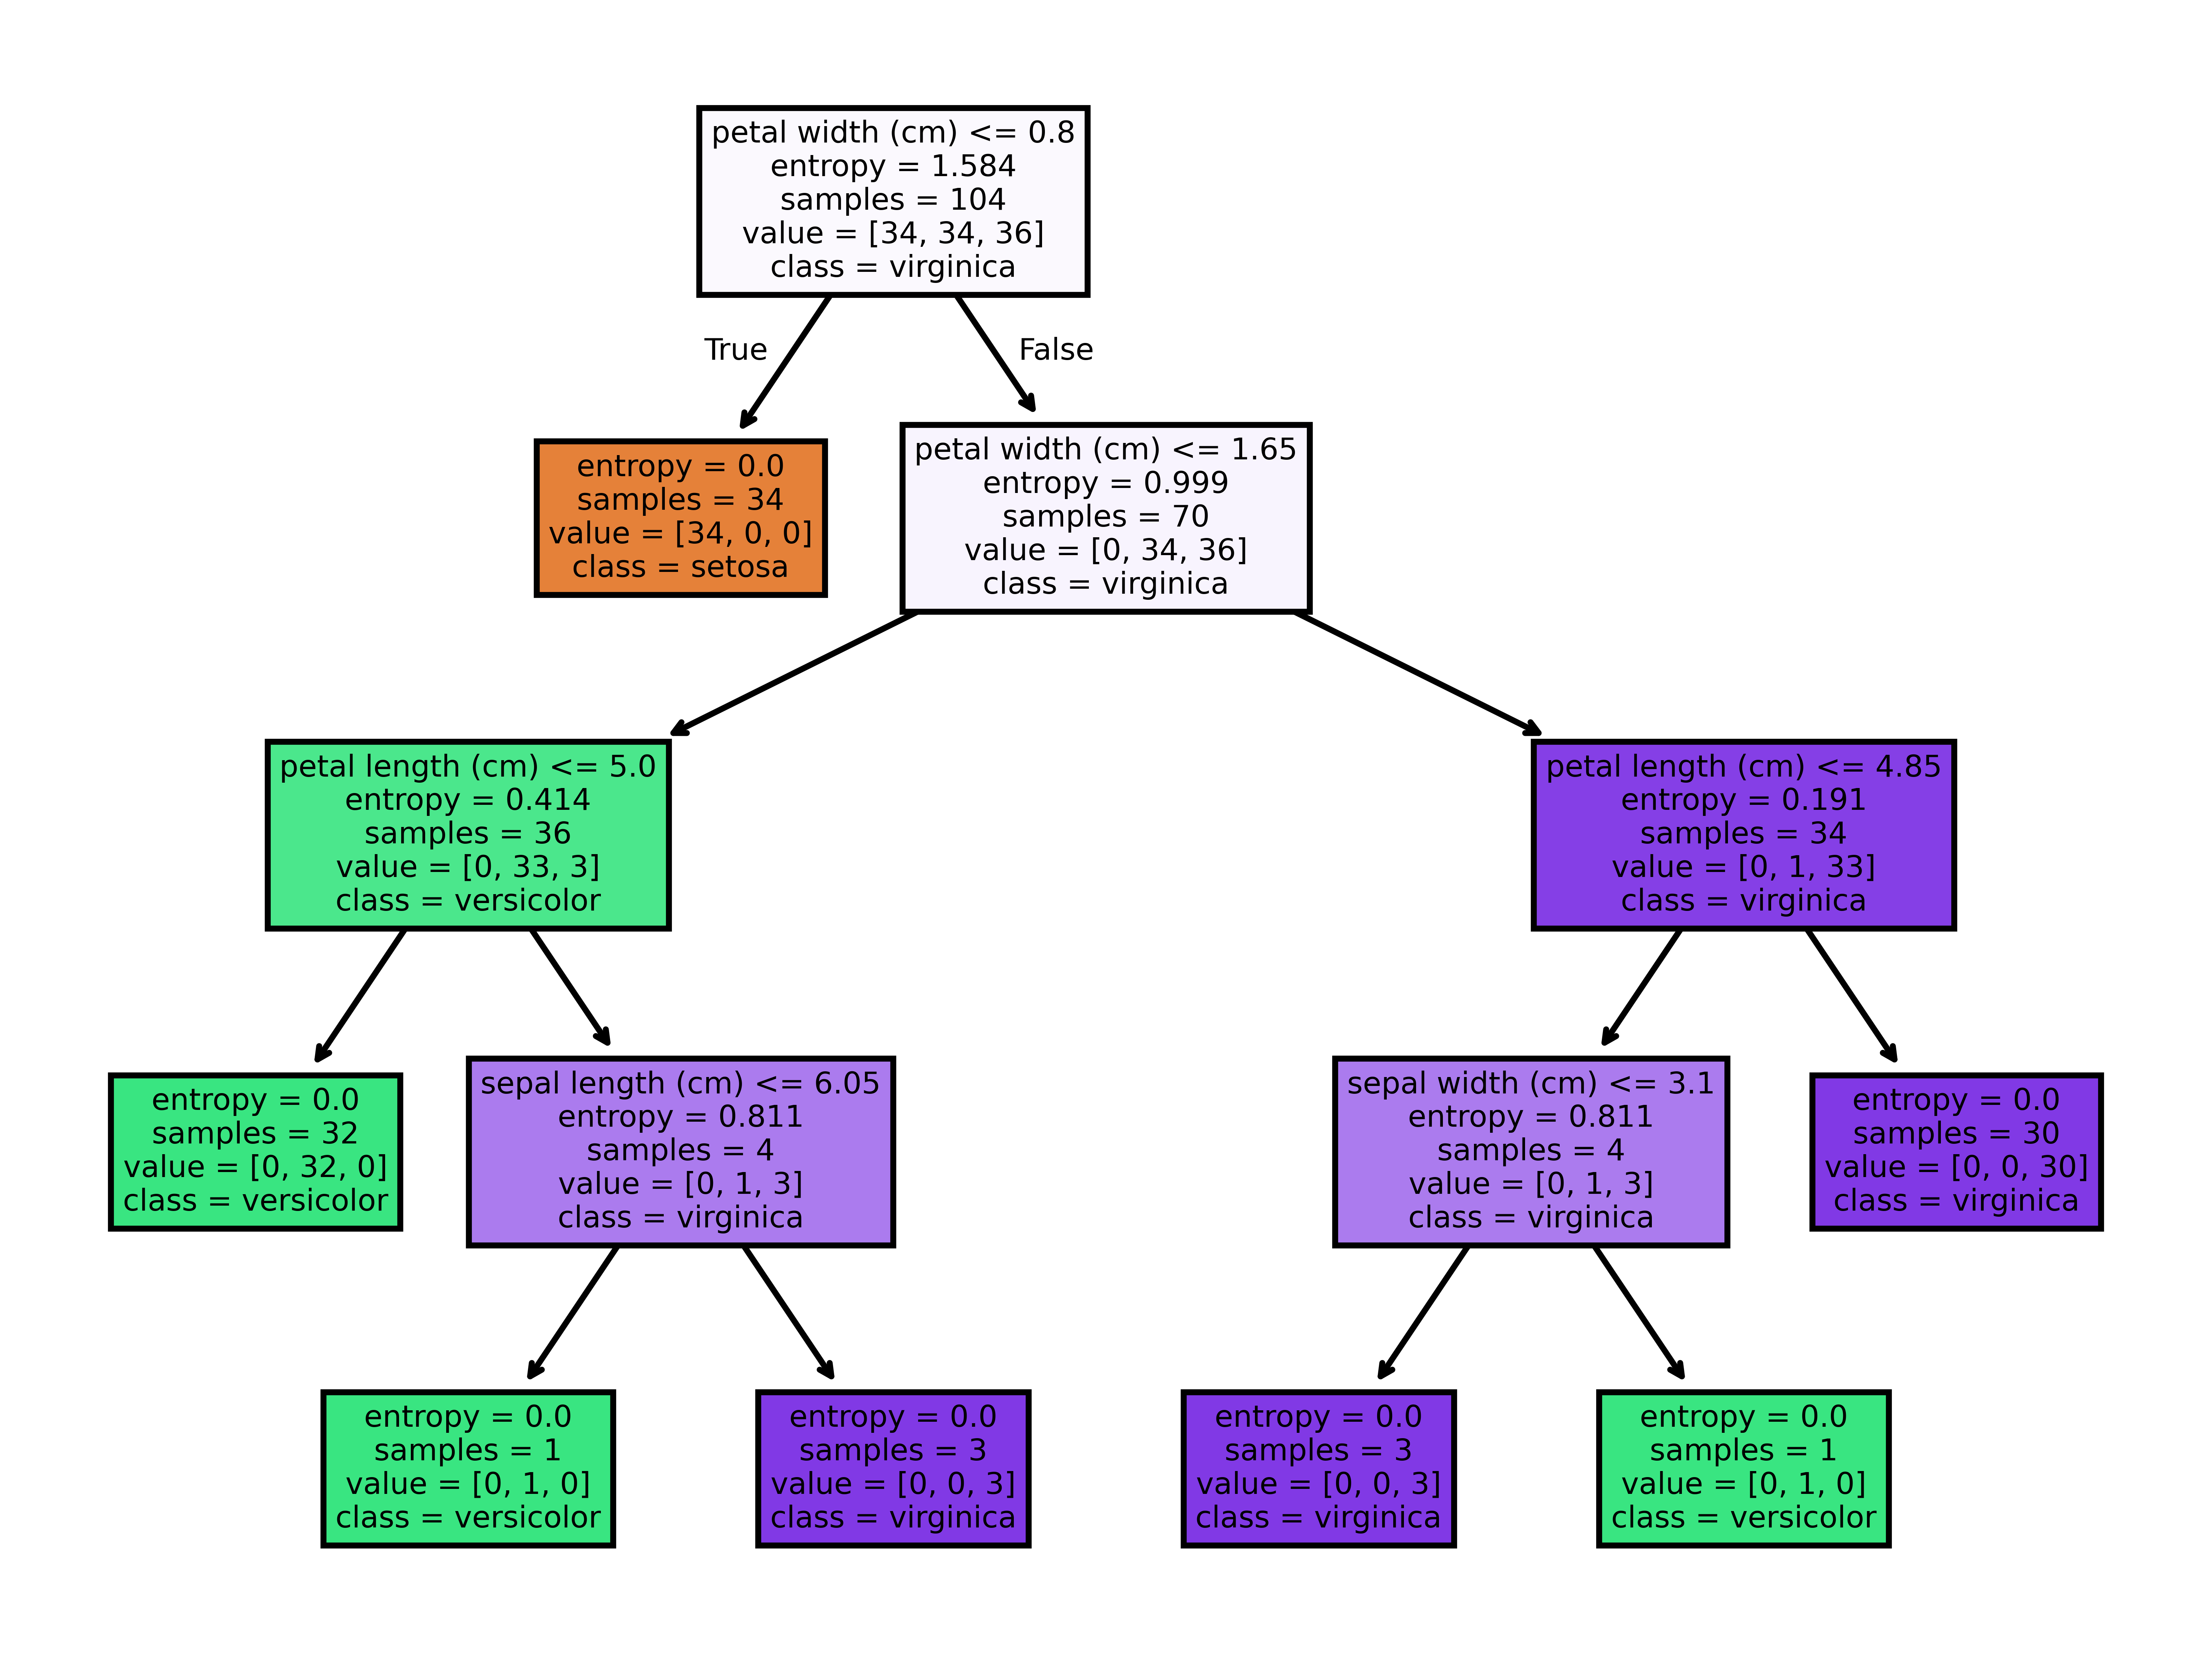

In [26]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
plt.figure(dpi=1200)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [27]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
preds

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2,
       0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 0,
       0])

In [28]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        16
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [29]:
# Prediction on train data

pred_train = model.predict(x_train)
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        36

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



## Illustration of Computing Precision for '0' class
### **Precision and Recall for Class '0' (Setosa) in the Iris Dataset**
In a **classification problem**, we evaluate the performance of a model using **precision** and **recall**. These metrics depend on the counts of **True Positives (TP), False Positives (FP), and False Negatives (FN)**.

---
### **1. Definitions:**
For **class '0' (Setosa)**:
- **True Positives (TP)** → The model correctly predicts a sample as **'0' (Setosa)**.
- **False Positives (FP)** → The model incorrectly predicts a sample as **'0' (Setosa)** when it actually belongs to another class.
- **False Negatives (FN)** → The model incorrectly predicts a sample as **not '0'** when it actually belongs to class '0'.

#### **Precision (for class '0')**  
$
\text{Precision} = \frac{TP}{TP + FP}
$
- **Measures how many of the predicted '0' (Setosa) are actually correct.**
- High precision means fewer false positives.

#### **Recall (for class '0')**  
$
\text{Recall} = \frac{TP}{TP + FN}
$
- **Measures how many of the actual '0' (Setosa) samples were correctly classified.**
- High recall means fewer false negatives.


### **Major Drawbacks of Simple Decision Trees**

While Decision Trees are intuitive and easy to interpret, they have several drawbacks that limit their performance, especially in complex tasks. Below are the key disadvantages:

---

### **1. Overfitting (High Variance)**
- **Problem:** Simple Decision Trees tend to **memorize training data**, leading to high accuracy on the training set but poor performance on unseen data.
- **Why?**  
  - They keep **splitting until every leaf is pure**, making them sensitive to noise and outliers.
  - As a result, they lack **generalization ability**.

✅ **Solution:** Use pruning techniques (pre-pruning or post-pruning) or ensemble methods like **Random Forest**.

---

### **2. Instability (Small Changes → Big Changes)**
- **Problem:** A small change in the dataset can lead to an entirely different tree.
- **Why?**  
  - Splitting at different points leads to **different structures**, making Decision Trees **unstable** compared to other models.

✅ **Solution:** Use **bagging (Bootstrap Aggregating)** to average multiple Decision Trees (like in Random Forests).

---

### **3. Bias Toward Dominant Features**
- **Problem:** Decision Trees favor features with more unique values.
- **Why?**  
  - The splitting criterion (like **Gini Impurity** or **Entropy**) tends to prefer **continuous-valued features** over categorical ones.

✅ **Solution:** Use **feature scaling techniques** or feature selection before training.

---

### **4. Exponential Growth of Tree Size**
- **Problem:** The number of nodes grows **exponentially** with increasing features and depth.
- **Why?**  
  - Each additional level doubles the number of nodes, leading to **computational inefficiency**.

✅ **Solution:**  
  - Limit tree depth (`max_depth`)  
  - Set minimum samples per leaf (`min_samples_leaf`)

---

### **5. Not Suitable for Linear Relationships**
- **Problem:** Decision Trees struggle with datasets where the relationship between features and the target variable is **strictly linear**.
- **Why?**  
  - They make **axis-parallel splits**, which are not efficient for linear separation.

✅ **Solution:** Use **Logistic Regression** or **SVM** for linearly separable data.

---

### **6. Poor Performance on Imbalanced Data**
- **Problem:** If one class dominates, Decision Trees tend to predict that class more often.
- **Why?**  
  - The tree **greedily** picks the best splits, which may ignore minority classes.

✅ **Solution:**  
  - Use **class weighting** (`class_weight='balanced'`)  
  - Apply **resampling techniques** (SMOTE for oversampling or undersampling)

---

### **7. Hard to Interpret Large Trees**
- **Problem:** While small Decision Trees are interpretable, deep trees with many splits become **complex and difficult to visualize**.
- **Why?**  
  - Too many branches reduce interpretability.

✅ **Solution:** Use **ensemble methods** like **Random Forest** or **Gradient Boosting**, which balance accuracy and interpretability.

---
